# 3D Geometry

- Rotations
- Distributions

Resources:
- Tangent space and exponential map: https://arwilliams.github.io/so3-exp.pdf
- Uniformely covering SO(3): https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.53.1357&rep=rep1&type=pdf
- https://www-sop.inria.fr/asclepios/cours/MVA/Rotations.pdf

In [5]:
import genjax
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

key = jax.random.PRNGKey(0)

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_rot(ax, r, s=0.1, length=0.1, normalize=True, **kwargs):
    # Coordinate frame data
    origin = [0,0,0]
    x_axis = s*r[:3,0]
    y_axis = s*r[:3,1]
    z_axis = s*r[:3,2]

    # Plotting the coordinate frame
    ax.quiver(*origin, *x_axis, color='r', label='X-axis', length=length, normalize=normalize, **kwargs)
    ax.quiver(*origin, *y_axis, color='g', label='Y-axis', length=length, normalize=normalize, **kwargs)
    ax.quiver(*origin, *z_axis, color='b', label='Z-axis', length=length, normalize=normalize, **kwargs)

## Tangent space of `SO(3)`

Tangent vectors of $SO(3)$ at the identidy $I$ are of the form by $I + S$, with $S$ satisfying $S = -S^\top$.

In [42]:
# Basis of Skew-Symmetric Matrices
SKEW_SYM_BASIS = jnp.array([
    [
        [ 0., 0.,  0.],
        [ 0., 0., -1.],
        [ 0., 1.,  0.],
    ],
    [
        [ 0., 0., 1.],
        [ 0., 0., 0.],
        [-1., 0., 0.],
    ],
        [
        [ 0., -1., 0.],
        [ 1.,  0., 0.],
        [ 0.,  0., 0.],
    ],
]);


def skew_matrix(w):
    """Isomorphism between R^3 and skew-symmetric matrices."""
    return jnp.einsum('kij,k->ij', SKEW_SYM_BASIS, w)


def exponential_map(w):
    """
    Exponential map from R^3 (or so(3)) to SO(3).
    
    Takes a axis-angle vector `w` and maps it to a right-handed rotation 
    around the axis given by `w` by an amount given by its norm `||w||`.
    """
    theta = jnp.linalg.norm(w)
    if theta == 0: return jnp.eye(3)
    S = skew_matrix(w)
    return jnp.eye(3) + (jnp.sin(theta)/theta)*S + ((1-jnp.cos(theta))/theta**2)*S@S


In [43]:
key = jax.random.PRNGKey(0)

for i in range(10):
    key,_ = jax.random.split(key)
    w = jax.random.normal(key, shape=(3,))

    S = skew_matrix(w)
    assert jnp.allclose(S, - S.T, atol=1e-6)
    
    R = exponential_map(w)
    assert jnp.allclose(R@R.T, jnp.eye(3), atol=1e-6)


[0.70710677 0.70710677 0.        ]
[ 0.99999994  1.0000001  -0.9999999 ]


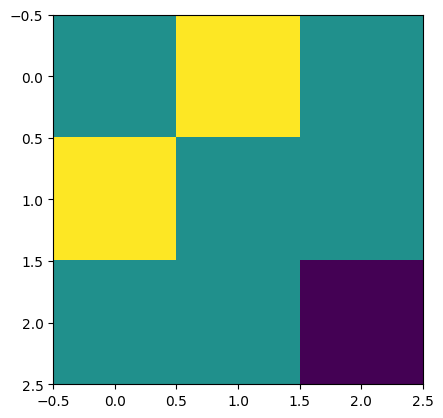

In [66]:
key = jax.random.PRNGKey(0)

key,_ = jax.random.split(key)
# w = jax.random.normal(key, shape=(3,))

w = jnp.array([1,1,0])
n = w/jnp.linalg.norm(w)
w = jnp.pi*n
   
R = exponential_map(w)

print(n)
print(jnp.sum(R.T, axis=0))
plt.imshow(R)

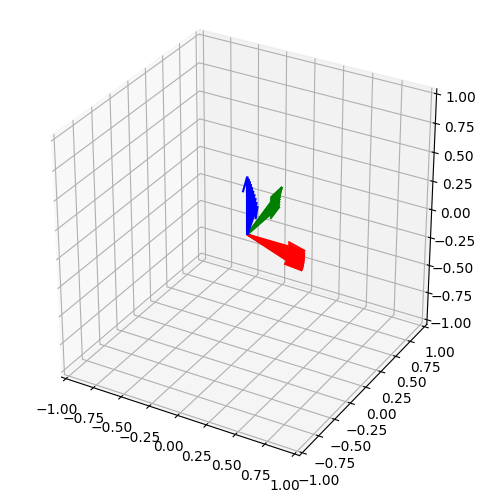

In [71]:
key = jax.random.PRNGKey(0)

key,_ = jax.random.split(key)
# w = jax.random.normal(key, shape=(3,))

w = jnp.array([1,1,0])
n = w/jnp.linalg.norm(w)
w = jnp.pi*n
   
R = exponential_map(w)



# -----------------
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

for s in np.linspace(0,0.2*jnp.pi, 10):

    w = jnp.array([1,1,0])
    n = w/jnp.linalg.norm(w)
    w = s*n
    
    R = exponential_map(w)


    plot_rot(ax, R, s=1., length=.5, normalize=True)